# Assignment 9 - Exercise 2
## Due July 2 at 14:00

Please note: 

- Read the instructions in the exercise PDF and in this notebook carefully.
- Add your solutions *only* at `YOUR CODE HERE`/`YOUR ANSWER HERE` and remove the corresponding `raise NotImplementedError()`.
- Do not chance the provided code and text, if not stated.
- Do not *add* or *delete* cells.
- Do not `import` additional functionality. 
- Before submitting: Please make sure, that your notebook can be executed from top to bottom `Menu -> Kernel -> Restart & Run all`. 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy import linalg as LA
from sklearn.metrics.pairwise import euclidean_distances
from numpy.testing import assert_equal, assert_almost_equal
from numpy.linalg import inv, eig

np.random.seed(42)

## Exercise 2

Implementing k-means and spectral clustering

### (a)

In [215]:
def kmeans_cluster(X, k):
    """ k-means cluster algorithm
    
    Parameters
    ----------
    X: (n, d) numpy array
       Datapoints to cluster 
    k: int
       Number of cluster centers
       
    Returns
    -------
    (clustering, centers): (n,) numpy array, (k, d) numpy array
        The cluster labels and the cluster center points
    """
    # YOUR CODE HERE
    n, dim  = X.shape
    centers = np.random.permutation(X)[:k]
    num_iterations = 300
    for iter in range(num_iterations):
        dist=np.zeros((n,1))
        for idx in range(k):
            dist = np.hstack((dist, euclidean_distances(X, centers[idx].reshape(1,-1))))
        dist = np.delete(dist, 0, axis = 1)
        labels = np.argmin(dist, axis = 1)
        new_centers=[]
        for idx in range(k):
            cluster_points = (labels == idx)
            new_centers.append(np.mean(X[cluster_points], axis = 0))
        centers = np.array(new_centers)
    
    return labels, centers

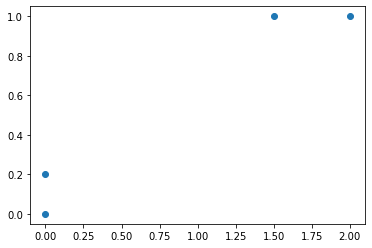

In [110]:
# We define some points to test the clustering
X_test = np.array([[0, 0], 
                   [0, .2],
                   [1.5, 1],
                   [2, 1]])

plt.scatter(X_test[:, 0], X_test[:, 1])
plt.show()

In [111]:
# feel free to plot clusters of these test points here to test your implementation (this is not graded)

In [112]:
labels, centers = kmeans_cluster(X_test, k=3)
assert_equal(labels.shape, (4,))
assert_equal(centers.shape, (3, 2))
assert_equal(np.unique(labels), [0, 1, 2])

labels, centers = kmeans_cluster(X_test, k=2)
assert_equal(np.unique(labels), [0, 1])

### (b)

From here on, you can use sklearn's `KMeans` if did not solve (a).
Of course you also can use your `kmeans_cluster`

In [113]:
from sklearn.cluster import KMeans
import scipy.io


X = scipy.io.loadmat('clusterdata.mat')['X']

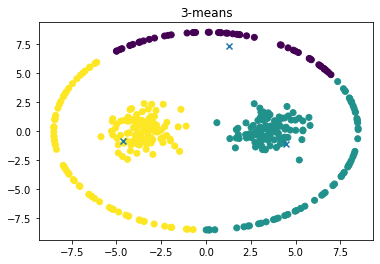

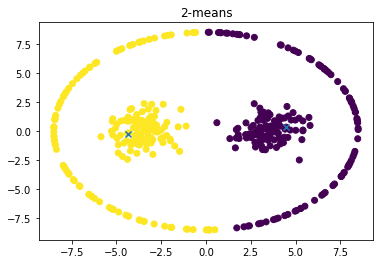

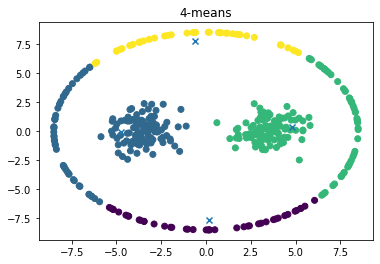

In [128]:
# YOUR CODE HERE (Sklearn Implementation)
kmeans = KMeans(n_clusters=3).fit(X)
plt.scatter(X[:, 0], X[:,1], c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x')
plt.title('3-means')
plt.show()



# YOUR CODE HERE
kmeans = KMeans(n_clusters = 2).fit(X)
plt.scatter(X[:, 0], X[:,1], c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x')
plt.title('2-means')
plt.show()



# YOUR CODE HERE
kmeans = KMeans(n_clusters = 4).fit(X)
plt.scatter(X[:, 0], X[:,1], c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x')
plt.title('4-means')
plt.show()

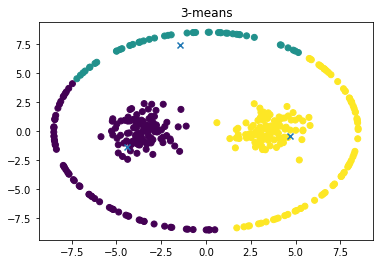

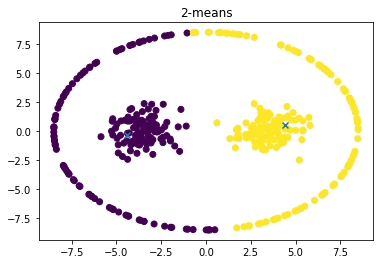

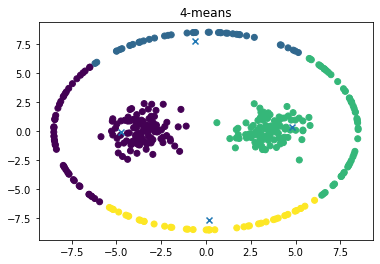

In [129]:
# YOUR CODE HERE
labels, centers = kmeans_cluster(X, 3)
plt.scatter(X[:, 0], X[:,1], c = labels)
plt.scatter(centers[:,0], centers[:,1], marker='x')
plt.title('3-means')
plt.show()



# YOUR CODE HERE
labels, centers = kmeans_cluster(X, 2)
plt.scatter(X[:, 0], X[:,1], c = labels)
plt.scatter(centers[:,0], centers[:,1], marker='x')
plt.title('2-means')
plt.show()



# YOUR CODE HERE
labels, centers = kmeans_cluster(X, 4)
plt.scatter(X[:, 0], X[:,1], c = labels)
plt.scatter(centers[:,0], centers[:,1], marker='x')
plt.title('4-means')
plt.show()

### (c)

In [174]:
def kneighbors_graph(X, k):
    """ Generate k-neirest-neighbor graph
    
    Parameters
    ----------
    X: (n, d) numpy array
       Datapoints
    k: int
       Number of neirest neighbors
       
    Returns
    -------
    W: (n, n) numpy array
        Adjacency matrix
    """
    # YOUR CODE HERE
    n, d = X.shape
    W = np.zeros((n, n))
    for i in range(n):
        dist_array = euclidean_distances(X[i].reshape(1,-1), np.delete(X, i, axis = 0))[0]
        min_k = np.argsort(dist_array)[:k]
        W[i,min_k] = 1
    return W
        

In [175]:
assert_equal(kneighbors_graph(X_test, k=2).shape, (4, 4))
assert_equal(kneighbors_graph(X_test, k=3).shape, (4, 4))
assert_equal(np.unique(kneighbors_graph(X_test, k=3)), [0, 1])
assert kneighbors_graph(X_test, k=2).sum() < kneighbors_graph(X_test, k=3).sum(),\
       "graph of k=3 should have more connections than k=2."



In [232]:
def spectral_cluster(W, k, normalize):
    """ Spectral clustering algorithm
    
    Parameters
    ----------
    W: (n, n) numpy array
       Adjacency matrix
    k: int
       Number of cluster means
    normalise: bool
       
       
    Returns
    -------
    (X_embed, clustering, centers): (n, k), (n,), (k, k) numpy arrays
        Adjacency matrix
    """
    # YOUR CODE HERE
    temp = np.sum(W, axis = 1)
    D = np.diag(temp)
    L = D - W
    if not normalize: 
        eig_val , v = np.linalg.eig(L)
        idx = np.argsort(-eig_val)[:k]
        X_embed = v[:, idx]
        
    else:
        D_sqrt_inv = np.diag(np.sqrt(1/temp))
        L_sym = D_sqrt_inv @ L @ D_sqrt_inv
        eig_val , v = np.linalg.eig(L_sym)
        idx = np.argsort(-eig_val)[:k]
        X_embed = D_sqrt_inv @ v[:, idx]
    
#     labels, clusters = kmeans_cluster(X_embed, k) Our Implementation
    kmeans = KMeans(n_clusters = k).fit(X_embed)
    clusters, labels = kmeans.cluster_centers_, kmeans.labels_
    return X_embed, labels, clusters


In [233]:
embedding, clustering, centers = spectral_cluster(kneighbors_graph(X_test, 2), 3, normalize=False)

assert_equal(embedding.shape, (4, 3))
assert_equal(clustering.shape, (4,))
assert_equal(centers.shape, (3, 3))

assert_equal(np.unique(clustering), [0, 1, 2])

assert_almost_equal(np.linalg.norm(embedding, axis=0)**2, [1, 1, 1])

In [234]:
embedding, clustering, centers = spectral_cluster(kneighbors_graph(X_test, 2), 3, normalize=True)

assert_equal(embedding.shape, (4, 3))
assert_equal(clustering.shape, (4,))
assert_equal(centers.shape, (3, 3))

assert_equal(np.unique(clustering), [0, 1, 2])

assert_almost_equal(np.linalg.norm(embedding, axis=0)**2, [.5, .5, .5])
assert_almost_equal(np.linalg.norm(centers, axis=0)**2, [.3125, .3125, .3125])

AssertionError: 
Arrays are not almost equal to 7 decimals

Mismatched elements: 2 / 3 (66.7%)
Max absolute difference: 0.1875
Max relative difference: 0.6
 x: array([0.5      , 0.3345164, 0.3125   ])
 y: array([0.3125, 0.3125, 0.3125])

### (d)

If you did not solve (c), you can use sklearn's `SpectralClustering` instead of `spectral_cluster`.

In [235]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import SpectralClustering

Unnormalized spectral clustering:

In [ ]:
# Spectral clustering of X with reasonable k
# YOUR CODE HERE


# Plot clusters
# YOUR CODE HERE
raise NotImplementedError()
plt.show()


# Plot 3d embedding
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches((10,10))
# YOUR CODE HERE
raise NotImplementedError()
plt.show()

Normalized spectral clustering:

In [ ]:
# Spectral clustering of X with reasonable k
# YOUR CODE HERE
raise NotImplementedError()


# Plot clusters
# YOUR CODE HERE
raise NotImplementedError()
plt.show()


# Plot 3d embedding
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
fig.set_size_inches((10,10))
# YOUR CODE HERE
raise NotImplementedError()
plt.show()